In [4]:
import pandas as pd
import numpy as np
import os
import glob

In [5]:
files_join = os.path.join("/Users/noyannebioglu/Desktop/Data_Analysis/some_projects/UDEMY/RealWorldProjectSales/sales_data_to_analyze", "*.csv")

In [27]:
list_files = glob.glob(files_join)
df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120010 entries, 0 to 1120009
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Order ID          1117830 non-null  object 
 1   Product           1117830 non-null  object 
 2   Quantity Ordered  1117830 non-null  object 
 3   Price Each        1117830 non-null  object 
 4   Order Date        1117830 non-null  object 
 5   Purchase Address  1117830 non-null  object 
 6   Unnamed: 0        933160 non-null   float64
 7   Unnamed: 0.1      746310 non-null   float64
 8   Unnamed: 0.1.1    373155 non-null   float64
dtypes: float64(3), object(6)
memory usage: 76.9+ MB


In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",NaN,NaN,NaN
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",NaN,NaN,NaN
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",NaN,NaN,NaN
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",NaN,NaN,NaN
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",NaN,NaN,NaN


In [30]:
df.to_csv("12_months.csv", encoding="utf-8")

### Checking for null values



In [31]:
df.isnull().sum()

Order ID              2180
Product               2180
Quantity Ordered      2180
Price Each            2180
Order Date            2180
Purchase Address      2180
Unnamed: 0          186850
Unnamed: 0.1        373700
Unnamed: 0.1.1      746855
dtype: int64

In [32]:
df.shape

(1120010, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120010 entries, 0 to 1120009
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Order ID          1117830 non-null  object 
 1   Product           1117830 non-null  object 
 2   Quantity Ordered  1117830 non-null  object 
 3   Price Each        1117830 non-null  object 
 4   Order Date        1117830 non-null  object 
 5   Purchase Address  1117830 non-null  object 
 6   Unnamed: 0        933160 non-null   float64
 7   Unnamed: 0.1      746310 non-null   float64
 8   Unnamed: 0.1.1    373155 non-null   float64
dtypes: float64(3), object(6)
memory usage: 76.9+ MB


### Dropping null values from DF

In [34]:
df.dropna(how="any", inplace=True,)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 146517 to 981998
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372610 non-null  object 
 1   Product           372610 non-null  object 
 2   Quantity Ordered  372610 non-null  object 
 3   Price Each        372610 non-null  object 
 4   Order Date        372610 non-null  object 
 5   Purchase Address  372610 non-null  object 
 6   Unnamed: 0        372610 non-null  float64
 7   Unnamed: 0.1      372610 non-null  float64
 8   Unnamed: 0.1.1    372610 non-null  float64
dtypes: float64(3), object(6)
memory usage: 28.4+ MB


In [36]:
#"link forr dropping columns good one"
#https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 146517 to 981998
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372610 non-null  object 
 1   Product           372610 non-null  object 
 2   Quantity Ordered  372610 non-null  object 
 3   Price Each        372610 non-null  object 
 4   Order Date        372610 non-null  object 
 5   Purchase Address  372610 non-null  object 
 6   Unnamed: 0        372610 non-null  float64
 7   Unnamed: 0.1      372610 non-null  float64
 8   Unnamed: 0.1.1    372610 non-null  float64
dtypes: float64(3), object(6)
memory usage: 28.4+ MB


### Saving as a new CSV file, in case of any failure, we will have a new file in the path

In [38]:
df.to_csv("new_12_months.csv", encoding="utf-8")

### Creating a function to extract "months" from "order date" column

In [39]:
def month(x):
    return x.split('/')[0]

### Applying the function to the column

In [40]:
df["months"] = df["Order Date"].apply(month)

### Lets check the current status

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 146517 to 981998
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          372610 non-null  object 
 1   Product           372610 non-null  object 
 2   Quantity Ordered  372610 non-null  object 
 3   Price Each        372610 non-null  object 
 4   Order Date        372610 non-null  object 
 5   Purchase Address  372610 non-null  object 
 6   Unnamed: 0        372610 non-null  float64
 7   Unnamed: 0.1      372610 non-null  float64
 8   Unnamed: 0.1.1    372610 non-null  float64
 9   months            372610 non-null  object 
dtypes: float64(3), object(7)
memory usage: 31.3+ MB


### Lets check the unique values in column.
#### Seems to be needed to filter "order date" values before converting the column into INTEGER

In [42]:
df['months'].value_counts()

12            49968
10            40564
04            36558
11            35146
05            33132
03            30306
07            28586
06            27108
02            23950
08            23922
09            23242
01            19418
Order Date      710
Name: months, dtype: int64

### Filtering out the "order date" values

In [43]:
filter=df["months"]=="Order Date"
df=df[~filter]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,months
146517,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",97678.0,48839.0,0.0,02
146518,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",97679.0,48840.0,1.0,02
146519,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",97680.0,48841.0,2.0,02
146520,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",97681.0,48842.0,3.0,02
146521,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",97682.0,48843.0,4.0,02


In [44]:
df["months"].value_counts()

12    49968
10    40564
04    36558
11    35146
05    33132
03    30306
07    28586
06    27108
02    23950
08    23922
09    23242
01    19418
Name: months, dtype: int64

### Casting as INTEGER, now we can make math calculations

In [45]:
df['months']=df['months'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 146517 to 981998
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  object 
 1   Product           371900 non-null  object 
 2   Quantity Ordered  371900 non-null  object 
 3   Price Each        371900 non-null  object 
 4   Order Date        371900 non-null  object 
 5   Purchase Address  371900 non-null  object 
 6   Unnamed: 0        371900 non-null  float64
 7   Unnamed: 0.1      371900 non-null  float64
 8   Unnamed: 0.1.1    371900 non-null  float64
 9   months            371900 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 31.2+ MB


In [47]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)

### Lets crerate a column of sales which rerflects the sale amount by multiplying QO & PE

In [48]:
df["sales"] = df["Quantity Ordered"]*df["Price Each"]

### What is the best month of sales??
#### Seems to be the December is the winner, it is a holiday season!

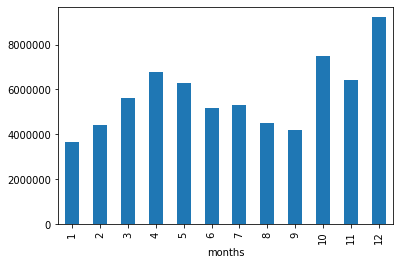

In [51]:
df.groupby("months")["sales"].sum().plot.bar()

Text(0, 0.5, 'Sales in US')

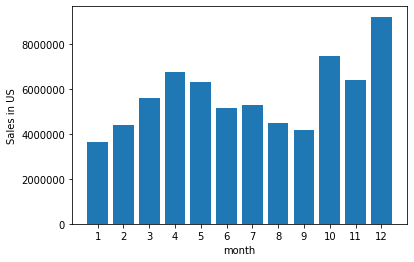

In [59]:
#to create a story out of it
import matplotlib.pyplot as plt
monthx=range(1,13)
plt.bar(monthx, df.groupby("months")["sales"].sum())
plt.xticks(monthx)
plt.xlabel("month")
plt.ylabel("Sales in US")

### First step to create a city column to split the city names and create series.

In [69]:
def city(x):
    x.split(",")[0]

In [70]:
#df["Purchase Address"].apply(city)

In [71]:
df["city"] = df["Purchase Address"].apply(city)

In [72]:
a = df["Purchase Address"].str.split(",")

### what time sales of product purchase hasthe maximum result?

In [73]:
def city(x):
    return x.split(",")[1] 

### Creating a column for cities, extracing values from "purchase address"

In [74]:
df["city"] = df["Purchase Address"].apply(city)

### Lets drop extra columns from our dataframe

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 146517 to 981998
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  object 
 1   Product           371900 non-null  object 
 2   Quantity Ordered  371900 non-null  int64  
 3   Price Each        371900 non-null  float64
 4   Order Date        371900 non-null  object 
 5   Purchase Address  371900 non-null  object 
 6   Unnamed: 0        371900 non-null  float64
 7   Unnamed: 0.1      371900 non-null  float64
 8   Unnamed: 0.1.1    371900 non-null  float64
 9   months            371900 non-null  int64  
 10  sales             371900 non-null  float64
 11  city              371900 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 36.9+ MB


### Checking the unique ones for NAN or absurd values

In [84]:
df["city"].value_counts()

 San Francisco    89464
 Los Angeles      59210
 New York City    49752
 Boston           39868
 Atlanta          29762
 Dallas           29640
 Seattle          29464
 Portland         24930
 Austin           19810
Name: city, dtype: int64

### Which city has the placed the most order?

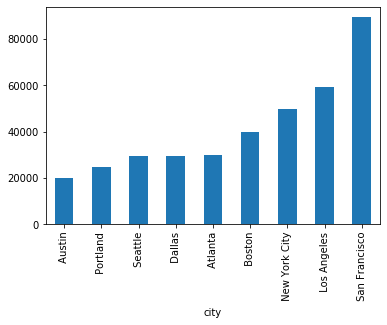

In [80]:
df.groupby("city")["city"].count().sort_values().plot.bar()

In [78]:
df["Order Date"].dtype

dtype('O')

### Converting "hour" column into datetime object to extract values for hours to use in anew column.

In [155]:
df["hour"] = df["Order Date"]=pd.to_datetime(df["Order Date"]).dt.hour

In [158]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,city,hour
48839,150502,iPhone,1,700.00,1,"866 Spruce St, Portland, ME 04101",2,700.00,Portland,1
48840,150503,AA Batteries (4-pack),1,3.84,7,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco,7
48841,150504,27in 4K Gaming Monitor,1,389.99,9,"52 6th St, New York City, NY 10001",2,389.99,New York City,9
48842,150505,Lightning Charging Cable,1,14.95,16,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta,16
48843,150506,AA Batteries (4-pack),2,3.84,20,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle,20


### Creating a table for keys and values

In [160]:
keys = []
hour = []
for key, hour_df in df.groupby("hour"):
    keys.append(key)
    hour.append(len(hour_df))

In [161]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

In [162]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

### Display the trend

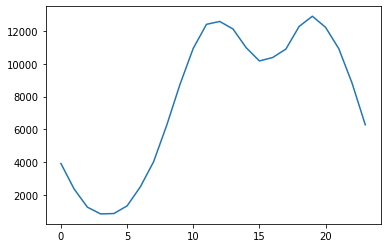

In [165]:
plt.plot(keys, hour)